<a href="https://colab.research.google.com/github/avelin0/Operational-Research/blob/main/prob_analise_sensibilidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
!pip install -q amplpy

from amplpy import tools

ampl = tools.ampl_notebook(
    modules=["highs", "coin","mosek"], 
    license_uuid="") 

Licensed to AMPL Community Edition License for <avel.bruno@gmail.com>.


# AMPL Problem

In [50]:
%%ampl_eval
reset;
var qa >= 0;
var qh >= 0;

maximize z: 350 * qa + 300 * qh;
s.t. r1: 9*qa + 6*qh <= 1566;
s.t. r2: 12*qa + 16*qh <= 2880;
s.t. r3: qa + qh <= 200;

In [51]:
%%ampl_eval

option solver mosek;

solve;

MOSEK 10.0.16: MOSEK 10.0.16: optimal; objective 66099.99992
0 simplex iterations
5 barrier iterations


# AMPL Solution

In [52]:
%%ampl_eval
display z;
display qa,qh;

z = 66100

qa = 122
qh = 78



In [53]:
%%ampl_eval 
option solver cbc;
solve;

cbc 2.10.7: cbc 2.10.7: optimal solution; objective 66100
0 simplex iterations


In [54]:
%%ampl_eval 
option solver mosek;
solve;

MOSEK 10.0.16: MOSEK 10.0.16: optimal; objective 66099.99992
0 simplex iterations
5 barrier iterations


# Sensitivity Analysis
- Ampl commands to Sensitivity Analysis

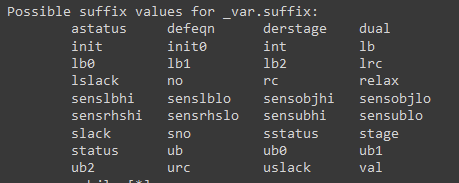

In [83]:
%%ampl_eval 
option solver mosek;
option mosek_options "alg:sens=1";
solve;

display _var.stage;

display _var;

display _con;

display _var.senslblo,_var.senslbhi;
display _var.sensublo,_var.sensubhi;
display _var.sensobjlo,_var.sensobjhi;
display _var.sensrhslo,_var.sensrhshi;

MOSEK 10.0.16: alg:sens=1
MOSEK 10.0.16: optimal; objective 66100
0 simplex iterations
5 barrier iterations
_var.stage [*] :=
1  0
2  0
;

_var [*] :=
1  122
2   78
;

_con [*] :=
1   16.6667
2    0
3  200
;

: _var.senslblo _var.senslbhi    :=
1     -1e+30          122
2     -1e+30           78
;

: _var.sensublo _var.sensubhi    :=
1     -1e+30         1e+30
2     -1e+30         1e+30
;

: _var.sensobjlo _var.sensobjhi    :=
1     300              450
2     233.333          350
;

: _var.sensrhslo _var.sensrhshi    :=
1        0              0
2        0              0
;



In [85]:
%%ampl_eval
display _nvars;  # number of variables
display _ncons;   # number of constraints

display _snvars;  #number of variables sent to the solver
display _sncons;  #number of constraints sent to the solver

_nvars = 2

_ncons = 3

_snvars = 2

_sncons = 3

